In [1]:
%matplotlib notebook

import cv2
import matplotlib.pyplot as plt
import signal

In [2]:
def signal_handler(signal, frame):
    # KeyboardInterrupt detected, exiting
    global is_interrupted
    is_interrupted = True

In [3]:
cascPath = "haarcascade_frontalface_default.xml"
# Загружаем каскады
faceCascade = cv2.CascadeClassifier(cascPath)

<IPython.core.display.Javascript object>


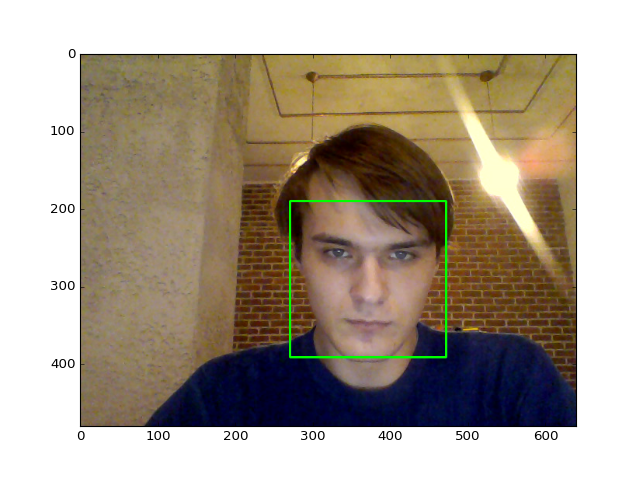

/home/ivmig/anaconda3/lib/python3.5/site-packages/matplotlib/backend_bases.py:2437: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


In [4]:

i = 1

vc = cv2.VideoCapture(0)

plt.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    # makes the blues image look real colored
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    faces = faceCascade.detectMultiScale(
        frame,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

signal.signal(signal.SIGINT, signal_handler)
is_interrupted = False

while is_capturing:
    i += 1
    if i % 100 == 0:
        i = 1
        is_capturing, frame = vc.read()
        # makes the blues image look real colored
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    

        faces = faceCascade.detectMultiScale(
            frame,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30)
        )

        # Draw a rectangle around the faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        webcam_preview.set_data(frame)
        plt.draw()

        try:    # Avoids a NotImplementedError caused by `plt.pause`
            plt.pause(.0000000001)
        except Exception:
            pass
        if is_interrupted:
            vc.release()
            break
        
# When everything is done, release the capture
vc.release()
cv2.destroyAllWindows()